# Testing the Musical MDN Code

This script trains and evaluates the `musical_mdn` model on synthetic sample data. First, 50000 points of sample data are generated, then a small network is trained on this data for 30 epochs. Finally, the network is run in unconstrained generation mode to examine the results directly.

The `musical_mdn` includes a 2D mixture density recurrent neural network (MDRNN) model with a loss function defined by Tensorflow's included probability distribution functions. 

### Import modules

In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import random
import numpy as np
import tensorflow as tf
import musical_mdn
import matplotlib.pyplot as plt
import pandas as pd

musical_mdn.MODEL_DIR = "./"

## Training Test

- generate synthetic training data (noisy sine).
- start a data manager (`SequenceDataLoader`)
- initialise the ANN (`TinyJamNet2D`).
- Train for 30 epochs.
- Plot the losses.

In [2]:
x_t_log = musical_mdn.generate_data()
loader = musical_mdn.SequenceDataLoader(num_steps = 121,batch_size = 100, corpus = x_t_log)
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_TRAIN, n_hidden_units = 128, n_mixtures = 10, batch_size = 100, sequence_length = 120)
losses = net.train(loader, 10, saving=True)
## Plot the losses.

Generating 50000 toy data samples.
                  t             x
count  50000.000000  50000.000000
mean       0.099998      0.000242
std        0.007073      0.708671
min        0.000100     -1.194008
25%        0.095200     -0.704006
50%        0.099984     -0.000610
75%        0.104786      0.705225
max        0.131320      1.159906
Total training examples: 49878
Done initialising loader.
INFO:tensorflow:Loading Training Operations
INFO:tensorflow:done initialising: tiny-perf-mdn-1layers-128units vars: 73522
INFO:tensorflow:going to train: tiny-perf-mdn-1layers-128units
INFO:tensorflow:trained batch: 200 of 498; loss was -1.894887
INFO:tensorflow:trained batch: 400 of 498; loss was -2.335233
INFO:tensorflow:trained epoch 0 of 10
INFO:tensorflow:saving model ./output-logs/tiny-perf-mdn-1layers-128units-20180108-161949/tiny-perf-mdn-1layers-128units.ckpt, global_step 498.
INFO:tensorflow:trained batch: 200 of 498; loss was -2.675573
INFO:tensorflow:trained batch: 400 of 498; loss w

Losses for each epoch.


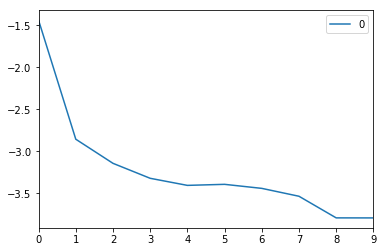

In [7]:
## Plot the losses.
loss_df = pd.DataFrame(losses)
loss_df.plot()
print("Losses for each epoch.")

## Evaluation Test

Predict 10000 Datapoints and plot some segments.

In [8]:
## Evaluation Test:
## Predict 10000 Datapoints.
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_RUN, n_hidden_units = 128, n_mixtures = 10, batch_size = 1, sequence_length = 1)

INFO:tensorflow:Loading Running Operations
INFO:tensorflow:done initialising: tiny-perf-mdn-1layers-128units vars: 73522


Test Input: [ 0.00784204  0.4593284 ]
INFO:tensorflow:Restoring parameters from ./tiny-perf-mdn-1layers-128units
Test Output:


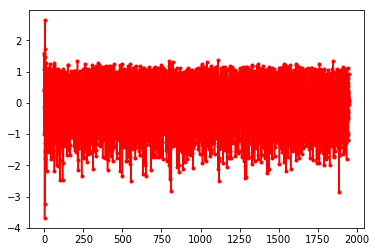

                  t             x          time
count  10001.000000  10001.000000  10001.000000
mean       0.194706     -0.055545    970.949488
std        0.246079      0.600028    559.662897
min       -0.670602     -3.677099     -0.766376
25%        0.069220     -0.390713    491.860732
50%        0.128219      0.007718    971.331428
75%        0.172255      0.334068   1452.303940
max        1.213042      2.641013   1947.255355
Window: 1000 to 1100


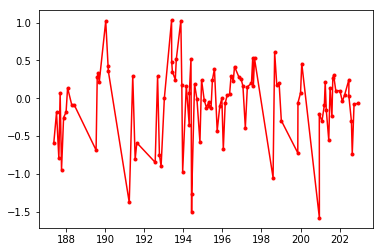

Window: 2000 to 2100


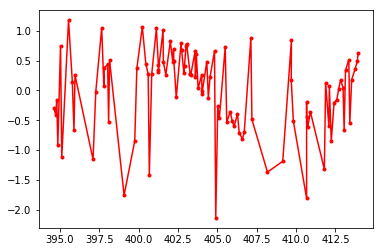

Window: 3000 to 3100


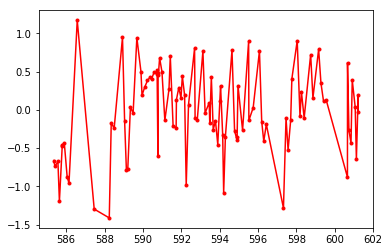

Window: 4000 to 4100


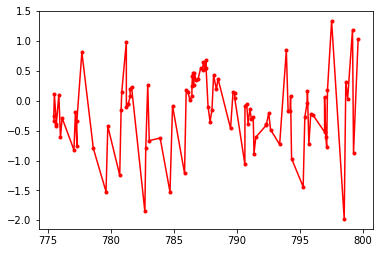

Window: 5000 to 5100


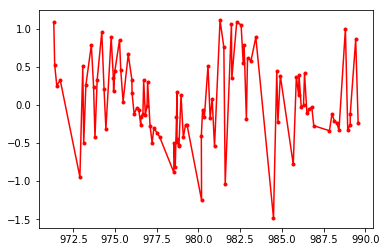

Window: 6000 to 6100


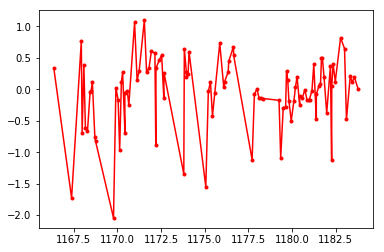

In [9]:
first_touch = np.array([(0.01 + (np.random.rand()-0.5)*0.005), (np.random.rand()-0.5)])
print("Test Input:",first_touch)
with tf.Session() as sess:
    perf = net.generate_performance(first_touch,10000,sess)
print("Test Output:")
perf_df = pd.DataFrame({'t':perf.T[0], 'x':perf.T[1]})
perf_df['time'] = perf_df.t.cumsum()
#plt.show(perf_df.plot('time','x',kind='scatter'))
plt.plot(perf_df.time, perf_df.x, '.r-')
plt.show()
print(perf_df.describe())
## Investigate Output
window = 100
for n in [1000,2000,3000,4000,5000,6000]:
    print("Window:", str(n),'to',str(n+window))
    plt.plot(perf_df[n:n+window].time, perf_df[n:n+window].x, '.r-')
    plt.show()